noting down the requirements and the cuda prerequisites since they'll be needed so the notebook can be used in different platforms

Cuda version = cuda 11.2
CuDNN = 8.1.1
tensorflow = tf-gpu 2.9.1

Also, on a later notice the project will be running on a docker containers

In [ ]:
import plotly.express as px
import tensorflow as tf
import PIL
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import random
import seaborn as sns
random.seed(100)
np.random.seed(100)


In [ ]:
tf . print(tf. __version__)
tf.random.set_seed(100)

testing the file path to see if the pictures are recognized


In [ ]:
for dirname, _, filenames in os.walk('CBIS-DDSM\jpeg'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


now defining the functions for the plotting


In [ ]:
# Distribution graphs (histogram/bar graph) of column data
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if 1 < nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

checking the first file calc_case_description_test_set.csv

In [ ]:
nRowsRead = None #1000 # specify 'None' if I want to read whole file
# calc_case_description_test_set.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('CBIS-DDSM/csv/calc_case_description_test_set.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'calc_case_description_test_set.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

In [ ]:
df1.head(5)

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

In [ ]:
plotCorrelationMatrix(df1, 8)

In [ ]:
plotScatterMatrix(df1, 12, 10)

checking meta.csv ?

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# meta.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('CBIS-DDSM/csv/meta.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'meta.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')


In [ ]:
df2.head(5)

In [ ]:
plotPerColumnDistribution(df2, 10, 5)

In [ ]:
plotCorrelationMatrix(df2, 8)

In [ ]:
plotScatterMatrix(df2, 9, 10)

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# mass_case_description_train_set.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('CBIS-DDSM/csv/mass_case_description_train_set.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'mass_case_description_train_set.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')


In [ ]:
df3.head(5)

In [ ]:
plotPerColumnDistribution(df3, 10, 5)

In [ ]:
plotCorrelationMatrix(df3, 8)

In [ ]:
plotScatterMatrix(df3, 12, 10)

In [ ]:
dicom_data = pd.read_csv('CBIS-DDSM/csv/dicom_info.csv')

In [ ]:
dicom_data.head()

information that is contained in the dicom images

In [ ]:
dicom_data.info()

In [ ]:
cropped_images=dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

dir containing the images

In [ ]:
image_dir = 'CBIS-DDSM/jpeg'

cropping images

In [ ]:
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images.head()

converting images to grayscale

In [ ]:
for file  in cropped_images[0:5]:
  cropped_images_show = PIL.Image.open(file)
  gray_img= cropped_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

full_mamogram_images contains the uncropped images

In [ ]:
full_mammogram_images=dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
#.replace(image_path,image_dir)
#image_path
full_mammogram_images.head()

convert them to grayscale

In [ ]:
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.head()


In [ ]:
for file  in full_mammogram_images[0:5]:
  full_mammogram_images_show = PIL.Image.open(file)
  gray_img= full_mammogram_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')


-----since last test-----
now we will need to extract the roi mask

In [ ]:
ROI_mask_images=dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

now to create the mask's graph

In [ ]:
for file  in ROI_mask_images[0:5]:
  ROI_mask_images_show = PIL.Image.open(file)
  gray_img= ROI_mask_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

Start reading data for every image




In [ ]:
data_1=pd.read_csv('CBIS-DDSM/csv/calc_case_description_train_set.csv')


In [ ]:
data_1.head()


In [ ]:
data_1.info()


In [ ]:
data_1.describe()

In [ ]:
data_2=pd.read_csv('CBIS-DDSM/csv/mass_case_description_train_set.csv')

In [ ]:
data_2.head()

In [ ]:
data_2.info()

In [ ]:
data_2.describe()

Data Cleaning

In [ ]:
dicom_cleaning_data = dicom_data.copy()
dicom_cleaning_data.head()


In [ ]:
dicom_cleaning_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate',
                                                'ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
                                                'StudyDate','StudyID','StudyInstanceUID','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'],axis =1, inplace=True)


In [ ]:
dicom_cleaning_data.info()

In [ ]:
dicom_cleaning_data.isna().sum()

In [ ]:
dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
dicom_cleaning_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
dicom_cleaning_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
dicom_cleaning_data.isna().sum()

In [ ]:
Data_cleaning_1 = data_1.copy()

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc type':'calc_type'})

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc distribution':'calc_distribution'})

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'image view':'image_view'})

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'left or right breast':'left_or_right_breast'})

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'breast density':'breast_density'})

In [ ]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'abnormality type':'abnormality_type'})

In [ ]:
Data_cleaning_1['pathology'] = Data_cleaning_1['pathology'].astype('category')

In [ ]:
Data_cleaning_1['calc_type'] = Data_cleaning_1['calc_type'].astype('category')

In [ ]:
Data_cleaning_1['calc_distribution'] = Data_cleaning_1['calc_distribution'].astype('category')

In [ ]:
Data_cleaning_1['abnormality_type'] = Data_cleaning_1['abnormality_type'].astype('category')

In [ ]:
Data_cleaning_1['image_view'] = Data_cleaning_1['image_view'].astype('category')

In [ ]:
Data_cleaning_1['left_or_right_breast'] = Data_cleaning_1['left_or_right_breast'].astype('category')

In [ ]:
Data_cleaning_1.isna().sum()

In [ ]:
Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)

In [ ]:
Data_cleaning_1.isna().sum()

In [ ]:
Data_cleaning_1.info()

In [ ]:
Data_cleaning_2 = data_2.copy()

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'mass_shape'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'left_or_right_breast'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'mass_margins'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'image_view'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'abnormality_type'})

In [ ]:
Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')

In [ ]:
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')

In [ ]:
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')

In [ ]:
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')

In [ ]:
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')

In [ ]:
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')

In [ ]:
Data_cleaning_2.isna().sum()


In [ ]:
Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True)


In [ ]:
Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True)


In [ ]:
Data_cleaning_2.isna().sum()


In [ ]:
Data_cleaning_2.info()


Data Visualazations


In [ ]:
r= pd.DataFrame(dicom_cleaning_data['SeriesDescription'].value_counts())
r= r.reset_index()
r= r.rename(columns={'SeriesDescription':'SeriesDescription_counts', 'index':'SeriesDescription'})
r

In [ ]:
ba_1 = px.bar(data_frame=r, x = 'SeriesDescription', y='SeriesDescription_counts', color='SeriesDescription')
ba_1.update_layout(title_text='Types of images used', title_x=0.5)
ba_1.show()

In [ ]:
Data_cleaning_1.info()

In [ ]:
Data_cleaning_2 = data_2.copy()

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'mass_shape'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'left_or_right_breast'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'mass_margins'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'image_view'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'abnormality_type'})

In [ ]:
Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')

In [ ]:
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')

In [ ]:
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')

In [ ]:
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')

In [ ]:
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')

In [ ]:
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')

In [ ]:
Data_cleaning_2.isna().sum()


In [ ]:
Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True)


In [ ]:
Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True)


In [ ]:
Data_cleaning_2.isna().sum()


In [ ]:
Data_cleaning_2.info()


Data Visualizations


In [ ]:
r= pd.DataFrame(dicom_cleaning_data['SeriesDescription'].value_counts())
r= r.reset_index()
r= r.rename(columns={'SeriesDescription':'SeriesDescription_counts', 'index':'SeriesDescription'})
r

In [ ]:
ba_1 = px.bar(data_frame=r, x = 'SeriesDescription', y='SeriesDescription_counts', color='SeriesDescription')
ba_1.update_layout(title_text='Types of images used', title_x=0.5)
ba_1.show()

from cbis-ddsm-breast-cancer-image-dataset : This study depends on Three types of images ; cropped images , ROI images , Full mammogram images . from this graph we conclude that cropped images is the most used between them

In [ ]:
q= pd.DataFrame(dicom_cleaning_data['PatientOrientation'].value_counts())
q= q.reset_index()
q= q.rename(columns={'PatientOrientation':'PatientOrientation_counts', 'index':'PatientOrientation'})
q

In [ ]:
qfig =px.pie(data_frame=q, names= 'PatientOrientation', values='PatientOrientation_counts', color = 'PatientOrientation')
qfig.update_layout(title_text='The percenyages of PatientOrientation ', title_x=0.5)
qfig.show()

from cbis-ddsm-breast-cancer-image-dataset in general : PatientOrientation (image_view) from the above graph MLO is much used than CC

In [ ]:
f= pd.DataFrame(dicom_cleaning_data['BodyPartExamined'].value_counts())
f= f.reset_index()
f= f.rename(columns={'BodyPartExamined':'BodyPartExamined_counts', 'index':'Breast part Examined'})
f

In [ ]:
ba = px.bar(data_frame=f, x = 'Breast part Examined', y='BodyPartExamined_counts', color='Breast part Examined')
ba.update_layout(title_text='Breast Parts Examined ', title_x=0.5,yaxis=dict(type='log'))
ba.show()

from the above gragh : The Most Part Examined is Breast(All;left and also right)

In [ ]:
data_insight_2 = pd.DataFrame({'abnormality':[Data_cleaning_1.abnormality_type[0],Data_cleaning_2.abnormality_type[0]],
                               'counts_of_abnormalties':[len(Data_cleaning_1),len(Data_cleaning_2)]})
data_insight_2

In [ ]:
bar_2 =px.bar(data_frame=data_insight_2, x = 'abnormality', y='counts_of_abnormalties', color = 'abnormality')
bar_2.update_layout(title_text='Types of abnormalites of cancer', title_x=0.5)
bar_2.show()

line 78 at https://www.kaggle.com/code/abeerabdelnasser/breast-cancer


In [ ]:
Data_cleaning_1.info()

In [ ]:
Data_cleaning_2 = data_2.copy()

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'mass_shape'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'left_or_right_breast'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'mass_margins'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'image_view'})

In [ ]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'abnormality_type'})

In [ ]:
Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')

In [ ]:
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')

In [ ]:
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')

In [ ]:
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')

In [ ]:
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')

In [ ]:
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')

In [ ]:
Data_cleaning_2.isna().sum()


In [ ]:
Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True)


In [ ]:
Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True)


In [ ]:
Data_cleaning_2.isna().sum()


In [ ]:
Data_cleaning_2.info()


Data Visualizations


In [ ]:
r= pd.DataFrame(dicom_cleaning_data['SeriesDescription'].value_counts())
r= r.reset_index()
r= r.rename(columns={'SeriesDescription':'SeriesDescription_counts', 'index':'SeriesDescription'})
r

In [ ]:
ba_1 = px.bar(data_frame=r, x = 'SeriesDescription', y='SeriesDescription_counts', color='SeriesDescription')
ba_1.update_layout(title_text='Types of images used', title_x=0.5)
ba_1.show()

from cbis-ddsm-breast-cancer-image-dataset : This study depends on Three types of images ; cropped images , ROI images , Full mammogram images . from this graph we conclude that cropped images is the most used between them

In [ ]:
q= pd.DataFrame(dicom_cleaning_data['PatientOrientation'].value_counts())
q= q.reset_index()
q= q.rename(columns={'PatientOrientation':'PatientOrientation_counts', 'index':'PatientOrientation'})
q

In [ ]:
qfig =px.pie(data_frame=q, names= 'PatientOrientation', values='PatientOrientation_counts', color = 'PatientOrientation')
qfig.update_layout(title_text='The percenyages of PatientOrientation ', title_x=0.5)
qfig.show()

from cbis-ddsm-breast-cancer-image-dataset in general : PatientOrientation (image_view) from the above graph MLO is much used than CC

In [ ]:
f= pd.DataFrame(dicom_cleaning_data['BodyPartExamined'].value_counts())
f= f.reset_index()
f= f.rename(columns={'BodyPartExamined':'BodyPartExamined_counts', 'index':'Breast part Examined'})
f

In [ ]:
ba = px.bar(data_frame=f, x = 'Breast part Examined', y='BodyPartExamined_counts', color='Breast part Examined')
ba.update_layout(title_text='Breast Parts Examined ', title_x=0.5,yaxis=dict(type='log'))
ba.show()

from the above gragh : The Most Part Examined is Breast(All;left and also right)

In [ ]:
data_insight_2 = pd.DataFrame({'abnormality':[Data_cleaning_1.abnormality_type[0],Data_cleaning_2.abnormality_type[0]],
                               'counts_of_abnormalties':[len(Data_cleaning_1),len(Data_cleaning_2)]})
data_insight_2

In [ ]:
bar_2 =px.bar(data_frame=data_insight_2, x = 'abnormality', y='counts_of_abnormalties', color = 'abnormality')
bar_2.update_layout(title_text='Types of abnormalites of cancer', title_x=0.5)
bar_2.show()

fom this gragh : They are two abnormalities of breast cancer ; Calcification abnormality and Mass abnormality . and Most cases are with calcification abnormalities

In [ ]:
x = Data_cleaning_1.left_or_right_breast.value_counts().RIGHT
y = Data_cleaning_1.left_or_right_breast.value_counts().LEFT
print(x,y)

In [ ]:
data_insight_3 = pd.DataFrame({'left_or_right_breast':['RIGHt','LEFT'] , 'Counts':[x,y]})
data_insight_3

In [ ]:
insight_3 = px.bar(data_insight_3, y= 'Counts', x='left_or_right_breast',color = 'left_or_right_breast')
insight_3.update_layout(title_text=' clacfication cancer position of breast ', title_x=0.5)
insight_3.show()


In [ ]:
z = pd.DataFrame(Data_cleaning_1['calc_type'].value_counts())
z = z.reset_index()
z= z.rename(columns={'calc_type':'calc_type_counts'})
z


In [ ]:
bar_3 =px.bar(data_frame=z, y = 'index', x='calc_type_counts', color = 'index', orientation='h')
bar_3.update_layout(title_text='Types of calcification cancer', title_x=0.5,xaxis=dict(type='log'))
bar_3.show()

Calcfication cancer has 45 types , Most of them obtain is PLEOMORPHIC


In [ ]:
g = pd.DataFrame(Data_cleaning_1['calc_distribution'].value_counts())
g = g.reset_index()
g= g.rename(columns={'calc_distribution':'calc_distribution_counts'})
g

In [ ]:
bar_4 =px.bar(data_frame=g, x = 'index', y='calc_distribution_counts', color = 'index', orientation='v')
bar_4.update_layout(title_text='Types of Distribution of calcification  cancer', title_x=0.5,yaxis=dict(type='log'))
bar_4.show()

for calcification cancer , there are 9 Types of Distribution of calcification cancer , Most of them obtained is Clustered

In [ ]:
I = pd.DataFrame(Data_cleaning_1['breast_density'].value_counts())
I =I.reset_index()
I= I.rename(columns={'index':'Breast density','breast_density':'counts'})
I


In [ ]:
bar_5 =px.pie(data_frame=I, names= 'Breast density', values='counts', color = 'Breast density')
bar_5.update_layout(title_text='The percenyages of Breast Density of calcification  cancer', title_x=0.5)
bar_5.show()


For calcification cancer , There are 4 breast Density , Most of them found is 3


In [ ]:
h = pd.DataFrame(Data_cleaning_1['assessment'].value_counts())
h =h.reset_index()
h=h.rename(columns={'index':'Breast assessment','assessment':'counts'})
h


In [ ]:
fig =px.pie(data_frame=h, values = 'counts', names='Breast assessment', color = 'Breast assessment')
fig.update_layout(title_text='The Percentages of assessment Breast calcification  cancer', title_x=0.5)
fig.show()


For calcfication cancer , There are 5 Types of assessments , Most of them obtains is 4


In [ ]:
v = pd.DataFrame(Data_cleaning_1['subtlety'].value_counts())
v =v.reset_index()
v=v.rename(columns={'index':'Breast subtlety','subtlety':'counts'})
v


In [ ]:
fig_1=px.pie(data_frame=v, values = 'counts', names='Breast subtlety', color = 'Breast subtlety')
fig_1.update_layout(title_text='The Percentages of subtlety Breast calcification  cancer', title_x=0.5)
fig_1.show()


For calcification cancer , There are 5 Subtlety , Most of them found is 3


In [ ]:
a = pd.DataFrame(Data_cleaning_1['pathology'].value_counts())
a =a.reset_index()
a=a.rename(columns={'index':'pathology','pathology':'counts'})
a


In [ ]:
fig_2 =px.bar(data_frame=a, x = 'pathology', y='counts', color = 'pathology', orientation='v')
fig_2.update_layout(title_text='pathology of calcification  cancer', title_x=0.5)
fig_2.show()


For calcification Cancer ,In Most Cases caner is Malignant

In [ ]:
b = pd.DataFrame(Data_cleaning_1['image_view'].value_counts())
b =b.reset_index()
b=b.rename(columns={'index':'image_view','image_view':'counts'})
b

In [ ]:
fig_3=px.pie(data_frame=b, values = 'counts', names='image_view', color = 'image_view')
fig_3.update_layout(title_text='The Percentages of image_view used in calcification  cancer', title_x=0.5)
fig_3.show()

For calcification Cancer , Most image view used is MLO (52.2%)



In [ ]:
j = pd.DataFrame(Data_cleaning_2['breast_density'].value_counts())
j =j.reset_index()
j= j.rename(columns={'index':'Breast density','breast_density':'counts'})
j

In [ ]:
fig_4 =px.pie(data_frame=j, names= 'Breast density', values='counts', color = 'Breast density')
fig_4.update_layout(title_text='The percenyages of Breast Density of mass  cancer', title_x=0.5)
fig_4.show()


for Mass Cancer , There are 4 values of Density Breast , Most of them found is 2

In [ ]:
k = pd.DataFrame(Data_cleaning_2['left_or_right_breast'].value_counts())
k =k.reset_index()
k= k.rename(columns={'index':'left_or_right_breast','left_or_right_breast':'counts'})
k


In [ ]:
fig_5 =px.bar(data_frame=k, x = 'left_or_right_breast', y='counts', color = 'left_or_right_breast', orientation='v')
fig_5.update_layout(title_text='position of mass cancer', title_x=0.5)
fig_5.show()


For Mass Cancer, Most cases ,Cancer is the Right Breast



In [ ]:
p = pd.DataFrame(Data_cleaning_2['pathology'].value_counts())
p =p.reset_index()
p=p.rename(columns={'index':'pathology','pathology':'counts'})
p


In [ ]:
fig_6 =px.bar(data_frame=p, x = 'pathology', y='counts', color = 'pathology', orientation='v')
fig_6.update_layout(title_text='pathology of mass  cancer', title_x=0.5)
fig_6.show()


for Mass Cancer , Most Cases of cancer is Malignant



In [ ]:
c = pd.DataFrame(Data_cleaning_2['subtlety'].value_counts())
c =c.reset_index()
c=c.rename(columns={'index':'Breast subtlety','subtlety':'counts'})

In [ ]:
fig_7=px.pie(data_frame=c, values = 'counts', names='Breast subtlety', color = 'Breast subtlety')
fig_7.update_layout(title_text='The Percentages of subtlety Breast mass  cancer', title_x=0.5)
fig_7.show()


For Mass Cancer , There are ^ Subtlety , Most of them found is%


In [ ]:
o = pd.DataFrame(Data_cleaning_2['assessment'].value_counts())
o =o.reset_index()
o=o.rename(columns={'index':'Breast assessment','assessment':'counts'})
o


In [ ]:
fig_8 =px.pie(data_frame=o, values = 'counts', names='Breast assessment', color = 'Breast assessment')
fig_8.update_layout(title_text='The Percentages of assessment Breast mass cancer', title_x=0.5)
fig_8.show()


for Mass Cancer, There are 6 assessment , Most of them found is 4


In [ ]:
s = pd.DataFrame(Data_cleaning_2['mass_shape'].value_counts())
s = s.reset_index()
s= s.rename(columns={'mass_shape':'mass_shape_counts'})
s


In [ ]:
fig_9 =px.bar(data_frame=s, y = 'index', x='mass_shape_counts', color = 'index', orientation='h')
fig_9.update_layout(title_text='Types of Mass_shape of mass cancer', title_x=0.5,xaxis=dict(type='log'))
fig_9.show()


For Mass Cancer , There are 18 types of Mass_shape , Most off them found is IRREGULAR


In [ ]:
u = pd.DataFrame(Data_cleaning_2['mass_margins'].value_counts())
u = u.reset_index()
u= u.rename(columns={'index':'mass_margins','mass_margins':'counts'})
u


In [ ]:
fig_10=px.bar(data_frame=u, y = 'mass_margins', x='counts', color = 'mass_margins', orientation='h')
fig_10.update_layout(title_text='Types of Mass_margins of mass cancer', title_x=0.5,xaxis=dict(type='log'))
fig_10.show()


for Mass Cancer , There are 15 type of Mass_margins , most of them found is CIRCUMSCRIBED


In [ ]:
t= pd.DataFrame(Data_cleaning_2['image_view'].value_counts())
t=t.reset_index()
t=t.rename(columns={'index':'image_view','image_view':'counts'})
t


In [ ]:
fig_11=px.pie(data_frame=t, values = 'counts', names='image_view', color = 'image_view')
fig_11.update_layout(title_text='The Percentages of image_view used in mass cancer', title_x=0.5)
fig_11.show()


For Mass cancer , Most image_view used is MLO (53.9%)



<h1>Apo edw kai katw den trexi tipota, ola stirizontai sto idc opote theloume allo me ddsm.</h1>

bellow we are trying to cast the data

In [ ]:
breast_img=[]
for dirname, _, filenames in os.walk('CBIS-DDSM\jpeg'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        breast_img.append(os.path.join(dirname, filename))

In [ ]:
for imgname in breast_img[:3]:
    print(imgname)

In [ ]:
non_can_img = []
can_img = []

for img in breast_img:
    if img[-5] == '0' :
        non_can_img.append(img)

    elif img[-5] == '1' :
        can_img.append(img)

In [ ]:
non_can_num = len(non_can_img)  # No cancer
can_num = len(can_img)   # Cancer

total_img_num = non_can_num + can_num

print('Number of Images of no cancer: {}' .format(non_can_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(can_num))   # images of cancer
print('Total Number of Images : {}' .format(total_img_num))

In [ ]:
from keras_preprocessing import image

plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_can_img), 18)
some_can = np.random.randint(0, len(can_img), 18)

s = 0
for num in some_non:

        img = image.load_img((non_can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)

        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

s = 1
for num in some_can:

        img = image.load_img((can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        plt.subplot(6, 6, 2*s)
        plt.axis('off')
        plt.title('cancer')
        plt.imshow(img.astype('uint8'))
        s += 1


In [ ]:
from matplotlib.image import imread
import cv2

some_non_img = random.sample(non_can_img, len(non_can_img))
some_can_img = random.sample(can_img, len(can_img))

non_img_arr = []
can_img_arr = []

for img in some_non_img:

    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])

for img in some_can_img:

    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [ ]:
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr, can_img_arr))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

print('X shape : {}' .format(X.shape))

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

rate = 0.5
num = int(X.shape[0] * rate)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))


In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)),
tf.keras.layers.MaxPooling2D(strides = 2),
tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides = 2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation = 'relu'),
tf.keras.layers.Dense(2, activation = 'softmax')
])

In [ ]:
model.summary()


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30 , batch_size = 75)


In [ ]:
model.evaluate(X_test,y_test)


In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


 <h1>Mexri kai edw </h1>

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
prediction = model.predict(X_test)
prediction


In [ ]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])


In [ ]:
index = 91
img_plot(X_test, index)


In [ ]:
input = X_test[index:index+1]


In [ ]:
pred = model.predict(input)[0].argmax()
label = y_test[index].argmax()

In [ ]:
print('Predicted Value using  cnn model',pred)
print("True Value",label)


In [294]:
Data_cleaning_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1546 non-null   object  
 1   breast_density           1546 non-null   int64   
 2   left_or_right_breast     1546 non-null   category
 3   image_view               1546 non-null   category
 4   abnormality id           1546 non-null   int64   
 5   abnormality_type         1546 non-null   category
 6   calc_type                1546 non-null   category
 7   calc_distribution        1546 non-null   category
 8   assessment               1546 non-null   int64   
 9   pathology                1546 non-null   category
 10  subtlety                 1546 non-null   int64   
 11  image file path          1546 non-null   object  
 12  cropped image file path  1546 non-null   object  
 13  ROI mask file path       1546 non-null   object  
dtypes: categ

In [295]:
Data_cleaning_2 = data_2.copy()

In [296]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'mass_shape'})

In [297]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'left_or_right_breast'})

In [298]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'mass_margins'})

In [299]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'image_view'})

In [300]:
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'abnormality_type'})

In [301]:
Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')

In [302]:
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')

In [303]:
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')

In [304]:
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')

In [305]:
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')

In [306]:
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')

In [307]:
Data_cleaning_2.isna().sum()


patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [308]:
Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True)


In [309]:
Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True)


In [310]:
Data_cleaning_2.isna().sum()


patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [311]:
Data_cleaning_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1318 non-null   object  
 1   breast_density           1318 non-null   int64   
 2   left_or_right_breast     1318 non-null   category
 3   image_view               1318 non-null   category
 4   abnormality id           1318 non-null   int64   
 5   abnormality_type         1318 non-null   category
 6   mass_shape               1318 non-null   category
 7   mass_margins             1318 non-null   category
 8   assessment               1318 non-null   int64   
 9   pathology                1318 non-null   category
 10  subtlety                 1318 non-null   int64   
 11  image file path          1318 non-null   object  
 12  cropped image file path  1318 non-null   object  
 13  ROI mask file path       1318 non-null   object  
dtypes: categ

Data Visualizations


In [312]:
r= pd.DataFrame(dicom_cleaning_data['SeriesDescription'].value_counts())
r= r.reset_index()
r= r.rename(columns={'SeriesDescription':'SeriesDescription_counts', 'index':'SeriesDescription'})
r

,SeriesDescription,SeriesDescription_counts
0,cropped images,3859
1,ROI mask images,3340
2,full mammogram images,3038


In [313]:
ba_1 = px.bar(data_frame=r, x = 'SeriesDescription', y='SeriesDescription_counts', color='SeriesDescription')
ba_1.update_layout(title_text='Types of images used', title_x=0.5)
ba_1.show()

from cbis-ddsm-breast-cancer-image-dataset : This study depends on Three types of images ; cropped images , ROI images , Full mammogram images . from this graph we conclude that cropped images is the most used between them

In [314]:
q= pd.DataFrame(dicom_cleaning_data['PatientOrientation'].value_counts())
q= q.reset_index()
q= q.rename(columns={'PatientOrientation':'PatientOrientation_counts', 'index':'PatientOrientation'})
q

,PatientOrientation,PatientOrientation_counts
0,MLO,5434
1,CC,4803


In [315]:
qfig =px.pie(data_frame=q, names= 'PatientOrientation', values='PatientOrientation_counts', color = 'PatientOrientation')
qfig.update_layout(title_text='The percenyages of PatientOrientation ', title_x=0.5)
qfig.show()

from cbis-ddsm-breast-cancer-image-dataset in general : PatientOrientation (image_view) from the above graph MLO is much used than CC

In [316]:
f= pd.DataFrame(dicom_cleaning_data['BodyPartExamined'].value_counts())
f= f.reset_index()
f= f.rename(columns={'BodyPartExamined':'BodyPartExamined_counts', 'index':'Breast part Examined'})
f

,Breast part Examined,BodyPartExamined_counts
0,BREAST,9671
1,Left Breast,318
2,Right Breast,248


In [317]:
ba = px.bar(data_frame=f, x = 'Breast part Examined', y='BodyPartExamined_counts', color='Breast part Examined')
ba.update_layout(title_text='Breast Parts Examined ', title_x=0.5,yaxis=dict(type='log'))
ba.show()

from the above gragh : The Most Part Examined is Breast(All;left and also right)

In [318]:
data_insight_2 = pd.DataFrame({'abnormality':[Data_cleaning_1.abnormality_type[0],Data_cleaning_2.abnormality_type[0]],
                               'counts_of_abnormalties':[len(Data_cleaning_1),len(Data_cleaning_2)]})
data_insight_2

,abnormality,counts_of_abnormalties
0,calcification,1546
1,mass,1318


In [319]:
bar_2 =px.bar(data_frame=data_insight_2, x = 'abnormality', y='counts_of_abnormalties', color = 'abnormality')
bar_2.update_layout(title_text='Types of abnormalites of cancer', title_x=0.5)
bar_2.show()

fom this gragh : They are two abnormalities of breast cancer ; Calcification abnormality and Mass abnormality . and Most cases are with calcification abnormalities

In [320]:
x = Data_cleaning_1.left_or_right_breast.value_counts().RIGHT
y = Data_cleaning_1.left_or_right_breast.value_counts().LEFT
print(x,y)

728 818


In [321]:
data_insight_3 = pd.DataFrame({'left_or_right_breast':['RIGHt','LEFT'] , 'Counts':[x,y]})
data_insight_3

,left_or_right_breast,Counts
0,RIGHt,728
1,LEFT,818


In [322]:
insight_3 = px.bar(data_insight_3, y= 'Counts', x='left_or_right_breast',color = 'left_or_right_breast')
insight_3.update_layout(title_text=' clacfication cancer position of breast ', title_x=0.5)
insight_3.show()


In [323]:
z = pd.DataFrame(Data_cleaning_1['calc_type'].value_counts())
z = z.reset_index()
z= z.rename(columns={'calc_type':'calc_type_counts'})
z


,index,calc_type_counts
0,PLEOMORPHIC,664
1,AMORPHOUS,139
2,PUNCTATE,106
3,LUCENT_CENTER,93
4,VASCULAR,82
5,FINE_LINEAR_BRANCHING,77
6,COARSE,35
7,ROUND_AND_REGULAR-LUCENT_CENTER,33
8,PLEOMORPHIC-FINE_LINEAR_BRANCHING,28
9,ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE,24


In [324]:
bar_3 =px.bar(data_frame=z, y = 'index', x='calc_type_counts', color = 'index', orientation='h')
bar_3.update_layout(title_text='Types of calcification cancer', title_x=0.5,xaxis=dict(type='log'))
bar_3.show()

Calcfication cancer has 45 types , Most of them obtain is PLEOMORPHIC


In [325]:
g = pd.DataFrame(Data_cleaning_1['calc_distribution'].value_counts())
g = g.reset_index()
g= g.rename(columns={'calc_distribution':'calc_distribution_counts'})
g

,index,calc_distribution_counts
0,CLUSTERED,1000
1,SEGMENTAL,214
2,REGIONAL,118
3,LINEAR,111
4,CLUSTERED-LINEAR,49
5,DIFFUSELY_SCATTERED,43
6,CLUSTERED-SEGMENTAL,5
7,LINEAR-SEGMENTAL,5
8,REGIONAL-REGIONAL,1


In [326]:
bar_4 =px.bar(data_frame=g, x = 'index', y='calc_distribution_counts', color = 'index', orientation='v')
bar_4.update_layout(title_text='Types of Distribution of calcification  cancer', title_x=0.5,yaxis=dict(type='log'))
bar_4.show()

for calcification cancer , there are 9 Types of Distribution of calcification cancer , Most of them obtained is Clustered

In [327]:
I = pd.DataFrame(Data_cleaning_1['breast_density'].value_counts())
I =I.reset_index()
I= I.rename(columns={'index':'Breast density','breast_density':'counts'})
I


,Breast density,counts
0,3,539
1,2,501
2,4,331
3,1,175


In [328]:
bar_5 =px.pie(data_frame=I, names= 'Breast density', values='counts', color = 'Breast density')
bar_5.update_layout(title_text='The percenyages of Breast Density of calcification  cancer', title_x=0.5)
bar_5.show()


For calcification cancer , There are 4 breast Density , Most of them found is 3


In [329]:
h = pd.DataFrame(Data_cleaning_1['assessment'].value_counts())
h =h.reset_index()
h=h.rename(columns={'index':'Breast assessment','assessment':'counts'})
h


,Breast assessment,counts
0,4,753
1,2,482
2,5,159
3,3,89
4,0,63


In [330]:
fig =px.pie(data_frame=h, values = 'counts', names='Breast assessment', color = 'Breast assessment')
fig.update_layout(title_text='The Percentages of assessment Breast calcification  cancer', title_x=0.5)
fig.show()


For calcfication cancer , There are 5 Types of assessments , Most of them obtains is 4


In [331]:
v = pd.DataFrame(Data_cleaning_1['subtlety'].value_counts())
v =v.reset_index()
v=v.rename(columns={'index':'Breast subtlety','subtlety':'counts'})
v


,Breast subtlety,counts
0,3,502
1,5,361
2,4,346
3,2,242
4,1,95


In [332]:
fig_1=px.pie(data_frame=v, values = 'counts', names='Breast subtlety', color = 'Breast subtlety')
fig_1.update_layout(title_text='The Percentages of subtlety Breast calcification  cancer', title_x=0.5)
fig_1.show()


For calcification cancer , There are 5 Subtlety , Most of them found is 3


In [333]:
a = pd.DataFrame(Data_cleaning_1['pathology'].value_counts())
a =a.reset_index()
a=a.rename(columns={'index':'pathology','pathology':'counts'})
a


,pathology,counts
0,MALIGNANT,544
1,BENIGN,528
2,BENIGN_WITHOUT_CALLBACK,474


In [334]:
fig_2 =px.bar(data_frame=a, x = 'pathology', y='counts', color = 'pathology', orientation='v')
fig_2.update_layout(title_text='pathology of calcification  cancer', title_x=0.5)
fig_2.show()


For calcification Cancer ,In Most Cases caner is Malignant

In [335]:
b = pd.DataFrame(Data_cleaning_1['image_view'].value_counts())
b =b.reset_index()
b=b.rename(columns={'index':'image_view','image_view':'counts'})
b

,image_view,counts
0,MLO,807
1,CC,739


In [336]:
fig_3=px.pie(data_frame=b, values = 'counts', names='image_view', color = 'image_view')
fig_3.update_layout(title_text='The Percentages of image_view used in calcification  cancer', title_x=0.5)
fig_3.show()

For calcification Cancer , Most image view used is MLO (52.2%)



In [337]:
j = pd.DataFrame(Data_cleaning_2['breast_density'].value_counts())
j =j.reset_index()
j= j.rename(columns={'index':'Breast density','breast_density':'counts'})
j

,Breast density,counts
0,2,585
1,3,337
2,1,287
3,4,109


In [338]:
fig_4 =px.pie(data_frame=j, names= 'Breast density', values='counts', color = 'Breast density')
fig_4.update_layout(title_text='The percenyages of Breast Density of mass  cancer', title_x=0.5)
fig_4.show()


for Mass Cancer , There are 4 values of Density Breast , Most of them found is 2

In [339]:
k = pd.DataFrame(Data_cleaning_2['left_or_right_breast'].value_counts())
k =k.reset_index()
k= k.rename(columns={'index':'left_or_right_breast','left_or_right_breast':'counts'})
k


,left_or_right_breast,counts
0,RIGHT,687
1,LEFT,631


In [340]:
fig_5 =px.bar(data_frame=k, x = 'left_or_right_breast', y='counts', color = 'left_or_right_breast', orientation='v')
fig_5.update_layout(title_text='position of mass cancer', title_x=0.5)
fig_5.show()


For Mass Cancer, Most cases ,Cancer is the Right Breast



In [341]:
p = pd.DataFrame(Data_cleaning_2['pathology'].value_counts())
p =p.reset_index()
p=p.rename(columns={'index':'pathology','pathology':'counts'})
p


,pathology,counts
0,MALIGNANT,637
1,BENIGN,577
2,BENIGN_WITHOUT_CALLBACK,104


In [342]:
fig_6 =px.bar(data_frame=p, x = 'pathology', y='counts', color = 'pathology', orientation='v')
fig_6.update_layout(title_text='pathology of mass  cancer', title_x=0.5)
fig_6.show()


for Mass Cancer , Most Cases of cancer is Malignant



In [343]:
c = pd.DataFrame(Data_cleaning_2['subtlety'].value_counts())
c =c.reset_index()
c=c.rename(columns={'index':'Breast subtlety','subtlety':'counts'})

In [344]:
fig_7=px.pie(data_frame=c, values = 'counts', names='Breast subtlety', color = 'Breast subtlety')
fig_7.update_layout(title_text='The Percentages of subtlety Breast mass  cancer', title_x=0.5)
fig_7.show()


For Mass Cancer , There are ^ Subtlety , Most of them found is%


In [345]:
o = pd.DataFrame(Data_cleaning_2['assessment'].value_counts())
o =o.reset_index()
o=o.rename(columns={'index':'Breast assessment','assessment':'counts'})
o


,Breast assessment,counts
0,4,533
1,5,299
2,3,279
3,0,129
4,2,77
5,1,1


In [346]:
fig_8 =px.pie(data_frame=o, values = 'counts', names='Breast assessment', color = 'Breast assessment')
fig_8.update_layout(title_text='The Percentages of assessment Breast mass cancer', title_x=0.5)
fig_8.show()


for Mass Cancer, There are 6 assessment , Most of them found is 4


In [347]:
s = pd.DataFrame(Data_cleaning_2['mass_shape'].value_counts())
s = s.reset_index()
s= s.rename(columns={'mass_shape':'mass_shape_counts'})
s


,index,mass_shape_counts
0,IRREGULAR,351
1,OVAL,323
2,LOBULATED,305
3,ROUND,123
4,ARCHITECTURAL_DISTORTION,80
5,IRREGULAR-ARCHITECTURAL_DISTORTION,47
6,LYMPH_NODE,26
7,ASYMMETRIC_BREAST_TISSUE,20
8,FOCAL_ASYMMETRIC_DENSITY,19
9,OVAL-LYMPH_NODE,6


In [348]:
fig_9 =px.bar(data_frame=s, y = 'index', x='mass_shape_counts', color = 'index', orientation='h')
fig_9.update_layout(title_text='Types of Mass_shape of mass cancer', title_x=0.5,xaxis=dict(type='log'))
fig_9.show()


For Mass Cancer , There are 18 types of Mass_shape , Most off them found is IRREGULAR


In [349]:
u = pd.DataFrame(Data_cleaning_2['mass_margins'].value_counts())
u = u.reset_index()
u= u.rename(columns={'index':'mass_margins','mass_margins':'counts'})
u


,mass_margins,counts
0,CIRCUMSCRIBED,305
1,SPICULATED,303
2,ILL_DEFINED,288
3,OBSCURED,201
4,MICROLOBULATED,113
5,CIRCUMSCRIBED-ILL_DEFINED,27
6,ILL_DEFINED-SPICULATED,26
7,CIRCUMSCRIBED-OBSCURED,19
8,OBSCURED-ILL_DEFINED,19
9,OBSCURED-ILL_DEFINED-SPICULATED,4


In [350]:
fig_10=px.bar(data_frame=u, y = 'mass_margins', x='counts', color = 'mass_margins', orientation='h')
fig_10.update_layout(title_text='Types of Mass_margins of mass cancer', title_x=0.5,xaxis=dict(type='log'))
fig_10.show()


for Mass Cancer , There are 15 type of Mass_margins , most of them found is CIRCUMSCRIBED


In [351]:
t= pd.DataFrame(Data_cleaning_2['image_view'].value_counts())
t=t.reset_index()
t=t.rename(columns={'index':'image_view','image_view':'counts'})
t


,image_view,counts
0,MLO,711
1,CC,607


In [352]:
fig_11=px.pie(data_frame=t, values = 'counts', names='image_view', color = 'image_view')
fig_11.update_layout(title_text='The Percentages of image_view used in mass cancer', title_x=0.5)
fig_11.show()


For Mass cancer , Most image_view used is MLO (53.9%)



<h1>Apo edw kai katw den trexi tipota, ola stirizontai sto idc opote theloume allo me ddsm.</h1>

bellow we are trying to cast the data

In [353]:
breast_img=[]
for dirname, _, filenames in os.walk('CBIS-DDSM\jpeg'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        breast_img.append(os.path.join(dirname, filename))

CBIS-DDSM\jpeg\1.3.6.1.4.1.9590.100.1.2.100018879311824535125115145152454291132\1-263.jpg
CBIS-DDSM\jpeg\1.3.6.1.4.1.9590.100.1.2.100018879311824535125115145152454291132\2-241.jpg
CBIS-DDSM\jpeg\1.3.6.1.4.1.9590.100.1.2.100131208110604806117271735422083351547\1-126.jpg
CBIS-DDSM\jpeg\1.3.6.1.4.1.9590.100.1.2.100522099512256189513864912954167862869\1-231.jpg
CBIS-DDSM\jpeg\1.3.6.1.4.1.9590.100.1.2.100522676511025180541602449080267145647\1-111.jpg
CBIS-DDSM\jpeg\1.3.6.1.4.1.9590.100.1.2.10055294210766234140934516480682841962\1-031.jpg
CBIS-DDSM\jpeg\1.3.6.1.4.1.9590.100.1.2.10055294210766234140934516480682841962\2-011.jpg
CBIS-DDSM\jpeg\1.3.6.1.4.1.9590.100.1.2.100579676611077714807988832023693299884\1-108.jpg
CBIS-DDSM\jpeg\1.3.6.1.4.1.9590.100.1.2.100631678311747240317898717702514834166\1-031.jpg
CBIS-DDSM\jpeg\1.3.6.1.4.1.9590.100.1.2.100632214012866120117337678502539182046\1-075.jpg
CBIS-DDSM\jpeg\1.3.6.1.4.1.9590.100.1.2.100682860911308271813943300011840547108\1-198.jpg
CBIS-DDSM\jp

In [354]:
for imgname in breast_img[:3]:
    print(imgname)

CBIS-DDSM\jpeg\1.3.6.1.4.1.9590.100.1.2.100018879311824535125115145152454291132\1-263.jpg
CBIS-DDSM\jpeg\1.3.6.1.4.1.9590.100.1.2.100018879311824535125115145152454291132\2-241.jpg
CBIS-DDSM\jpeg\1.3.6.1.4.1.9590.100.1.2.100131208110604806117271735422083351547\1-126.jpg


In [355]:
non_can_img = []
can_img = []

for img in breast_img:
    if img[-5] == '0' :
        non_can_img.append(img)

    elif img[-5] == '1' :
        can_img.append(img)

In [356]:
non_can_num = len(non_can_img)  # No cancer
can_num = len(can_img)   # Cancer

total_img_num = non_can_num + can_num

print('Number of Images of no cancer: {}' .format(non_can_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(can_num))   # images of cancer
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 1035
Number of Images of cancer : 1022
Total Number of Images : 2057


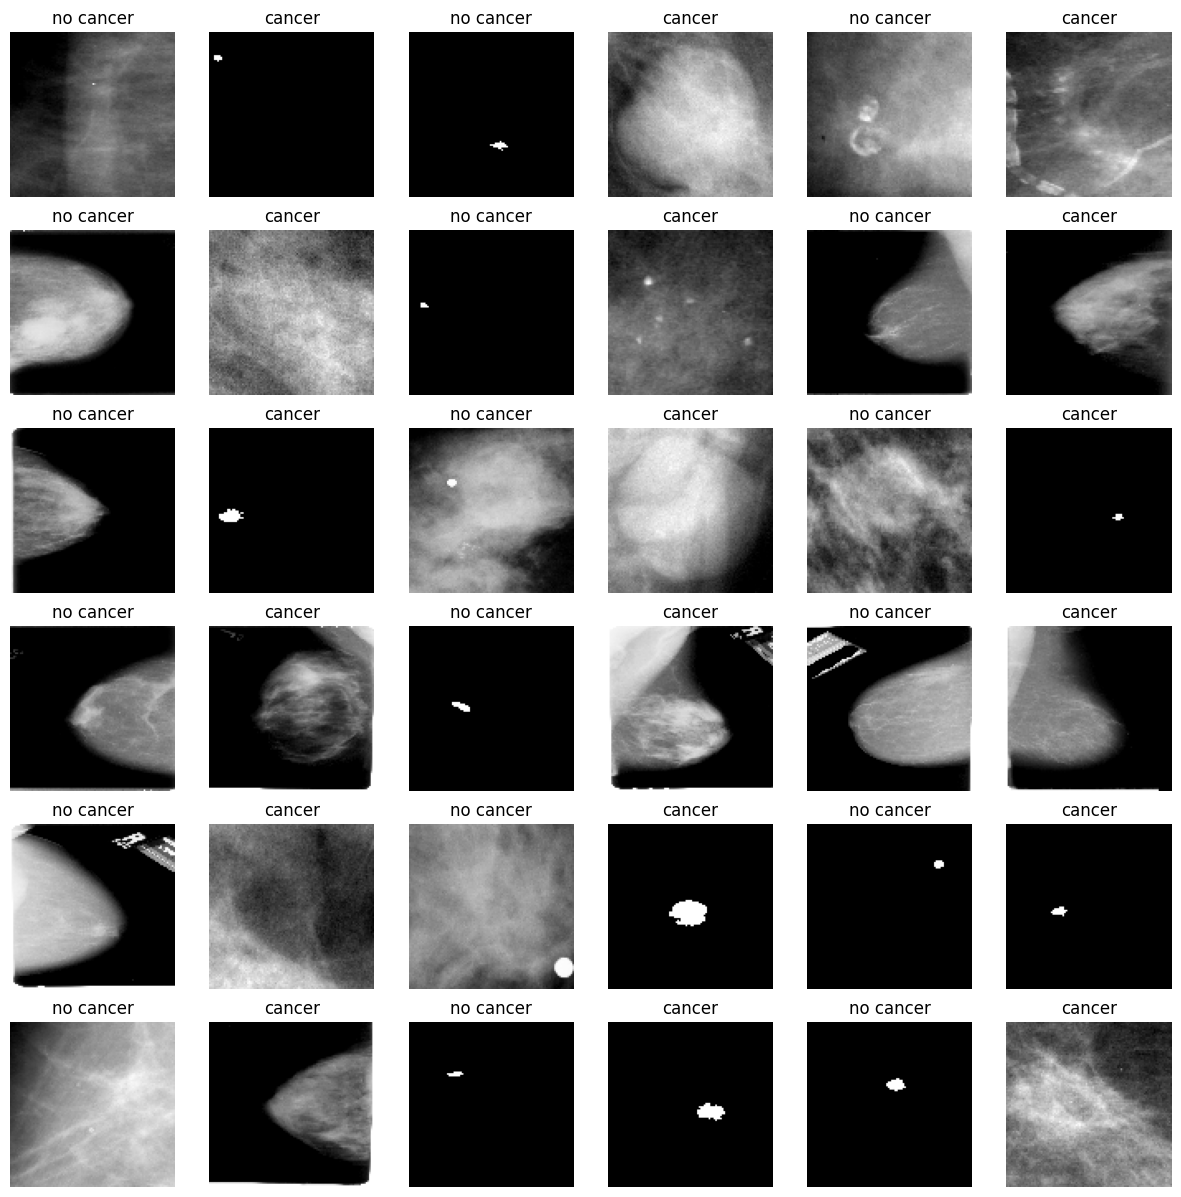

In [357]:
from keras_preprocessing import image

plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_can_img), 18)
some_can = np.random.randint(0, len(can_img), 18)

s = 0
for num in some_non:

        img = image.load_img((non_can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)

        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

s = 1
for num in some_can:

        img = image.load_img((can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        plt.subplot(6, 6, 2*s)
        plt.axis('off')
        plt.title('cancer')
        plt.imshow(img.astype('uint8'))
        s += 1


In [358]:
from matplotlib.image import imread
import cv2

some_non_img = random.sample(non_can_img, len(non_can_img))
some_can_img = random.sample(can_img, len(can_img))

non_img_arr = []
can_img_arr = []

for img in some_non_img:

    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])

for img in some_can_img:

    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [359]:
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr, can_img_arr))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

print('X shape : {}' .format(X.shape))

X shape : (2057, 50, 50, 3)


<__array_function__ internals>:180: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [360]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

rate = 0.5
num = int(X.shape[0] * rate)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))


X_train shape : (1542, 50, 50, 3)
X_test shape : (515, 50, 50, 3)
y_train shape : (1542, 2)
y_test shape : (515, 2)


In [367]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)),
tf.keras.layers.MaxPooling2D(strides = 2),
tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides = 2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation = 'relu'),
tf.keras.layers.Dense(2, activation = 'softmax')
])

In [368]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 128)       

In [369]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [372]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30 , batch_size = 75)


Epoch 1/30
21/21 [==============================] - 0s 19ms/step - loss: 0.0903 - accuracy: 0.9728 - val_loss: 0.9507 - val_accuracy: 0.8369
Epoch 2/30
21/21 [==============================] - 0s 16ms/step - loss: 0.0798 - accuracy: 0.9805 - val_loss: 0.8508 - val_accuracy: 0.8408
Epoch 3/30
21/21 [==============================] - 0s 17ms/step - loss: 0.0427 - accuracy: 0.9896 - val_loss: 1.0195 - val_accuracy: 0.8485
Epoch 4/30
21/21 [==============================] - 0s 16ms/step - loss: 0.0336 - accuracy: 0.9922 - val_loss: 1.1934 - val_accuracy: 0.8466
Epoch 5/30
21/21 [==============================] - 0s 16ms/step - loss: 0.0315 - accuracy: 0.9896 - val_loss: 1.1356 - val_accuracy: 0.8485
Epoch 6/30
21/21 [==============================] - 0s 17ms/step - loss: 0.0215 - accuracy: 0.9955 - val_loss: 1.1464 - val_accuracy: 0.8427
Epoch 7/30
21/21 [==============================] - 0s 16ms/step - loss: 0.0218 - accuracy: 0.9955 - val_loss: 1.1249 - val_accuracy: 0.8466
Epoch 8/30
21

In [371]:
model.evaluate(X_test,y_test)


17/17 [==============================] - 0s 8ms/step - loss: 0.7792 - accuracy: 0.8311


[0.7791751027107239, 0.8310679793357849]

17/17 [==============================] - 0s 4ms/step


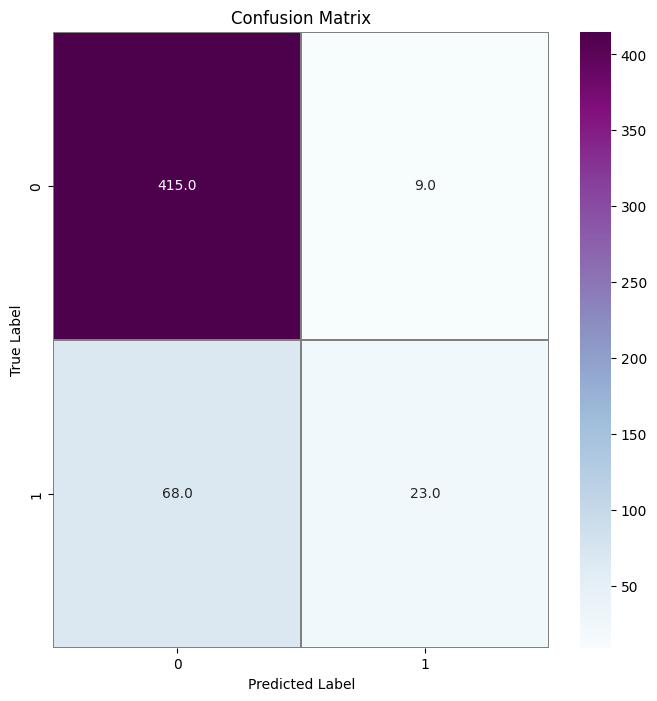

In [376]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


 <h1>Mexri kai edw </h1>

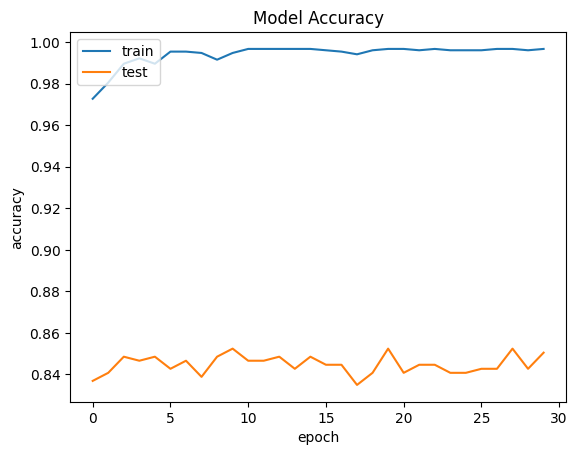

In [377]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


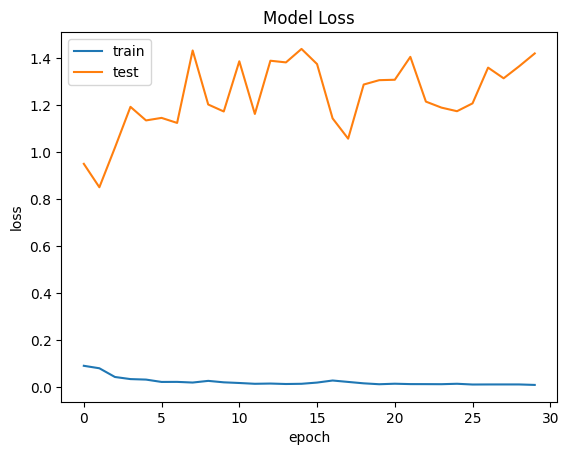

In [378]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [379]:
prediction = model.predict(X_test)
prediction


17/17 [==============================] - 0s 8ms/step


array([[1.0000000e+00, 1.3825874e-09],
       [2.2644213e-01, 7.7355790e-01],
       [1.0000000e+00, 5.3415910e-08],
       ...,
       [1.0000000e+00, 1.8362934e-13],
       [1.0000000e+00, 6.9092392e-11],
       [1.0000000e+00, 1.8564863e-17]], dtype=float32)

In [380]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])


In [1]:
index = 91
img_plot(X_test, index)


NameError: name 'img_plot' is not defined

In [382]:
input = X_test[index:index+1]


In [385]:
pred = model.predict(input)[0].argmax()
label = y_test[index].argmax()

1/1 [==============================] - 0s 17ms/step


In [386]:
print('Predicted Value using  cnn model',pred)
print("True Value",label)


Predicted Value using  cnn model 0
True Value 0
